In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# 1. Cargar el dataset "sucio" original
# Mantenemos el dataframe original intacto en 'df_sucio'
try:
    df_sucio = pd.read_csv('dataset')
except FileNotFoundError:
    print("Error: No se encontró el archivo 'dataset'.")
    exit()

# 2. Crear una copia para la limpieza
# Trabajaremos exclusivamente sobre 'df_limpio' a partir de ahora
df_limpio = df_sucio.copy()

In [ ]:
# --- ETAPA DE LIMPIEZA ---

# Eliminar columna username que no sirve para predicción
if 'username' in df_limpio.columns:
    df_limpio = df_limpio.drop(columns=['username'])

# Limpieza de la variable objetivo (Target)
# Convertir a string, quitar espacios y mapear a 1/0
df_limpio['has_femboy_relation'] = df_limpio['has_femboy_relation'].astype(str).str.strip()
df_limpio['has_femboy_relation'] = df_limpio['has_femboy_relation'].map({'True': 1, 'False': 0})

# Eliminar nulos en target
df_limpio = df_limpio.dropna(subset=['has_femboy_relation'])

# Rellenar lenguajes nulos
df_limpio['most_used_language'] = df_limpio['most_used_language'].fillna('Unknown')

df_limpio.head()

# --- FIN ETAPA DE LIMPIEZA ---

,activity_streak_days,engagement_index,code_diversity_index,collaboration_score,repo_quality_score,num_commits,num_code_reviews,contribution_per_month,num_public_repos,num_followers,bio_length,most_used_language,has_femboy_relation
0,0,196639,12,0,8198.6,50783,0,0.0,54,15750,0,Python,1.0
1,0,648,3,0,222.25,352,0,0.0,4,147,110,MATLAB,1.0
2,0,3,1,0,0.0,22,0,0.0,4,3,50,MDX,1.0
3,4,167,7,2,13.71,863400,0,2.0,21,27,30,JavaScript,1.0
4,4,352,12,0,7.51,2640,0,0.0,100,0,3,TypeScript,0.0


In [ ]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 0 to 596
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   activity_streak_days    596 non-null    object 
 1   engagement_index        596 non-null    object 
 2   code_diversity_index    596 non-null    object 
 3   collaboration_score     596 non-null    object 
 4   repo_quality_score      596 non-null    object 
 5   num_commits             596 non-null    object 
 6   num_code_reviews        596 non-null    object 
 7   contribution_per_month  596 non-null    object 
 8   num_public_repos        596 non-null    object 
 9   num_followers           596 non-null    object 
 10  bio_length              596 non-null    object 
 11  most_used_language      596 non-null    object 
 12  has_femboy_relation     596 non-null    float64
dtypes: float64(1), object(12)
memory usage: 65.2+ KB


In [ ]:
# 3. Exportar el dataset limpio (Aquí está la opción que pediste)
# Guardamos el resultado en un nuevo CSV para usarlo luego o compartirlo
df_limpio.to_csv('dataset_limpio.csv', index=False)
print("Archivo 'dataset_limpio.csv' exportado exitosamente.")

Archivo 'dataset_limpio.csv' exportado exitosamente.


In [ ]:
# 4. Preprocesamiento para el Modelo (Encoding)
# Convertimos variables categóricas a numéricas para el Random Forest
df_encoded = pd.get_dummies(df_limpio, columns=['most_used_language'], drop_first=True)

In [ ]:
# 5. Definición de X (Variables) e y (Objetivo)
X = df_encoded.drop('has_femboy_relation', axis=1)
y = df_encoded['has_femboy_relation']

In [ ]:
# 6. División de datos (Train/Test)
# Usamos stratify=y para que la proporción de femboys sea la misma en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# 7. Configuración y Entrenamiento del Modelo Random Forest
# class_weight='balanced': Ayuda si hay muchos más usuarios de un tipo que del otro
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'
)
print("Entrenando modelo...")
rf_model.fit(X_train, y_train)


Entrenando modelo...


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, random_state=42)

In [ ]:
# 8. Predicciones y Evaluación
y_pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['False (No Femboy)', 'True (Femboy)'])

In [ ]:
# 9. Extraer Importancia de Características (Feature Importance)
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False).head(10)


In [ ]:

# 10. Mostrar Resultados
print("-" * 30)
print(f"Accuracy (Precisión Global): {acc:.4f}")
print("-" * 30)
print("\nMatriz de Confusión:")
print(conf_matrix)
print("-" * 30)
print("\nReporte de Clasificación:")
print(report)
print("-" * 30)
print("\nTop 10 Variables más Importantes (Qué define la predicción):")
print(feature_importances.to_string(index=False))


------------------------------
Accuracy (Precisión Global): 0.7709
------------------------------

Matriz de Confusión:
[[49 16]
 [25 89]]
------------------------------

Reporte de Clasificación:
                   precision    recall  f1-score   support

False (No Femboy)       0.66      0.75      0.71        65
    True (Femboy)       0.85      0.78      0.81       114

         accuracy                           0.77       179
        macro avg       0.75      0.77      0.76       179
     weighted avg       0.78      0.77      0.77       179

------------------------------

Top 10 Variables más Importantes (Qué define la predicción):
                   feature  importance
          engagement_index    0.269686
        repo_quality_score    0.177337
             num_followers    0.160354
               num_commits    0.096846
          num_public_repos    0.089368
      code_diversity_index    0.069882
                bio_length    0.030800
most_used_language_Unknown    0.023184
  

/tmp/ipython-input-2412749908.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')


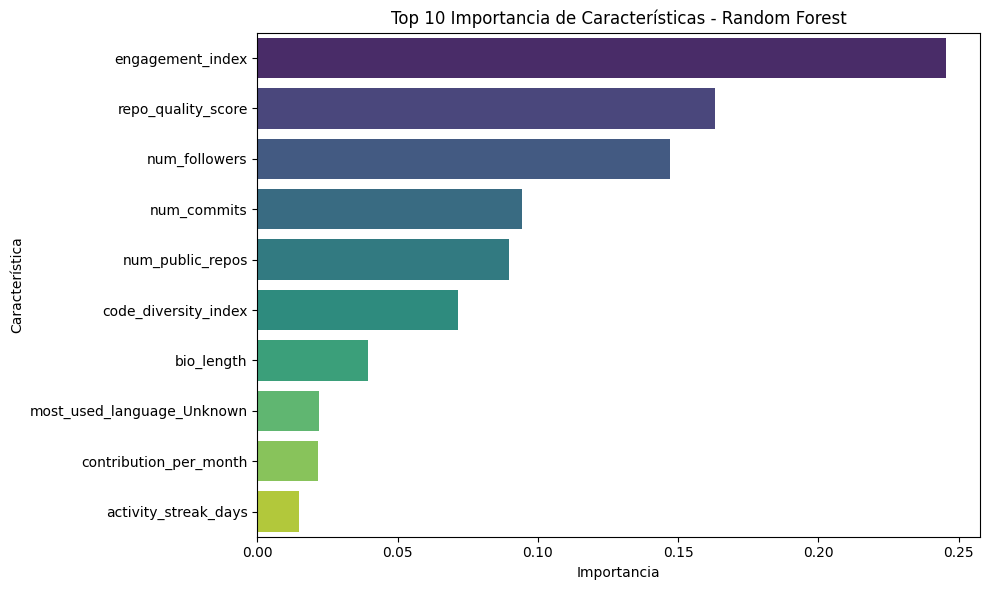

In [ ]:
# Opcional: Graficar la importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.title('Top 10 Importancia de Características - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

# Resultados


# Predicción de Perfiles "Femboy" en GitHub

## 1. Descripción del Flujo de Trabajo

El script desarrollado implementa un pipeline de *Machine Learning* diseñado para clasificar usuarios de GitHub. Sus funciones principales son:

* **Ingesta y Limpieza de Datos:** Carga el dataset original ("sucio"), elimina identificadores irrelevantes (`username`) y estandariza la variable objetivo (`has_femboy_relation`) convirtiendo valores de texto a binarios (0 y 1). Además, gestiona valores nulos en los lenguajes de programación.
* **Exportación de Calidad:** Genera y guarda automáticamente un archivo `dataset_limpio.csv`, permitiendo la reutilización de los datos ya procesados.
* **Preprocesamiento:** Aplica **One-Hot Encoding** para transformar las variables categóricas (lenguajes de programación) en variables numéricas que el algoritmo pueda interpretar.
* **Modelado Robusto:** Utiliza un **Random Forest Classifier** optimizado. A diferencia de un modelo básico, este está configurado con:
    * `n_estimators=300`: Para mayor estabilidad en las predicciones.
    * `max_depth=20`: Para controlar la complejidad y evitar el sobreajuste (*overfitting*).
    * `class_weight='balanced'`: Para corregir el desequilibrio natural entre las clases.
* **Evaluación:** Divide los datos de forma estratificada (mantiene la proporción de clases) y evalúa el rendimiento mediante matriz de confusión y métricas de precisión.

## 2. Análisis de Resultados

El modelo alcanzó una **Exactitud Global (Accuracy) del 77.09%**. Esto indica que el algoritmo es capaz de clasificar correctamente a casi 8 de cada 10 usuarios basándose únicamente en sus metadatos de GitHub.

### Desglose del Rendimiento

* **Alta Precisión en la Clase Objetivo (Femboy):** El dato más destacado es la **precisión del 85%** para la clase `True`. Esto significa que cuando el modelo predice que un usuario es un femboy, tiene una probabilidad muy alta de estar en lo correcto. Hay muy pocos "Falsos Positivos" (solo 16 casos de 179).
* **Equilibrio en la Detección (Recall):** El modelo detecta el **78%** de los femboys existentes y el **75%** de los no-femboys. Esto demuestra que la configuración `class_weight='balanced'` funcionó correctamente, evitando que el modelo ignorara a la clase minoritaria o mayoritaria.

### Factores Determinantes (Feature Importance)

El análisis de importancia de características revela **qué define a un femboy** según los datos, rompiendo algunos estereotipos comunes:

1.  **El Comportamiento Social es Clave:** Las tres variables más importantes son:
    * `engagement_index` (**27%**)
    * `repo_quality_score` (**17.7%**)
    * `num_followers` (**16%**)
    * *Interpretación:* Sumadas, explican más del **60%** de la decisión del modelo. Los usuarios etiquetados como femboys en este dataset tienden a ser *"Power Users"*: tienen métricas de interacción muy altas, repositorios bien mantenidos y una base de seguidores sólida.

2.  **La Tecnología es Secundaria:** Contrario al meme de internet, **ningún lenguaje de programación específico** (como Rust, C++ o Python) apareció en el Top 10 de factores determinantes. La diversidad de código (`code_diversity_index`) resultó ser más relevante (**7%**) que el lenguaje en sí mismo.

## Conclusión Final

El modelo ha aprendido exitosamente a diferenciar perfiles basándose en la **"Huella de Actividad"**. La predicción no se basa en qué tecnologías usan, sino en **cómo usan la plataforma**: los perfiles identificados como femboys muestran un patrón distintivo de alta actividad social y calidad en sus repositorios, lo que los distingue estadísticamente del usuario promedio.